# INM430: Principles of Data Science: Lab07

# (High Dimensional and) Finding Structures in Data

## Tutorials and Exercises

### Import necessary libraries

In [438]:
# for basic operations
import pandas as pd
import numpy as np

# for visualisation
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import pylab
import seaborn as sns

# for statistics
import math
import statsmodels.api as sm
import scipy
from scipy import stats
import scipy.stats.distributions as dist

# regression
import sklearn
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import scipy.stats as stats

# to see all the columns in tabular view
pd.set_option('display.max_columns', None)

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Exercise 0: scikit-learn basics

### Exercise 1: Dimension reduction with PCA

#### 1. Load the data

In [310]:
df_cr = pd.read_csv("censusCrimeClean.csv")

In [311]:
df_cr.shape

(1994, 102)

In [312]:
df_cr.head(3)

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43


#### 2. Select only numerical columns

In [313]:
df_cr.iloc[:,1:].head(3)

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43


In [314]:
df_cr_num = df_cr.iloc[:,1:]

In [315]:
df_cr_num.head(10)

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.00,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.90,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
5,1,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,1.00,0.52,0.68,0.20,0.61,0.28,0.15,0.25,0.62,0.72,0.76,0.77,0.28,0.52,0.48,0.60,0.01,0.12,0.

#### 3. Create and fit PCA with two components

In [316]:
from sklearn.decomposition import PCA

In [317]:
pca = PCA(n_components = 2)

In [318]:
pca.fit(df_cr_num)

PCA(n_components=2)

#### 4. Explained variance ratio

In [319]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[8.26130789 1.08655844]
[0.67387831 0.08863102]


##### Use sklearn.preprocessing.scale function

In [320]:
# scaling
df_cr_num_sc = preprocessing.scale(df_cr_num, 
                                   axis = 0, # independently standardize each feature
                                   with_mean = True, # center the data before scaling
                                   with_std = True, # scale the data to unit variance (or equivalently, unit standard deviation)
                                   copy = True)

##### Check the scaled data frame

In [321]:
# have a look at scaled df
df_check = pd.DataFrame(df_cr_num_sc)
df_check.columns = df_cr_num.columns
df_check.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,-1.564227,1.043612,-0.814997,-0.630002,0.599578,-0.161288,0.111765,-0.542791,-0.166286,-0.277923,-0.575886,1.060081,0.683004,0.042409,0.885045,0.237338,0.585942,-1.043545,-0.755482,-0.293978,0.072263,0.260385,0.117537,0.168474,0.403647,-0.268000,0.394136,0.129599,0.191492,-0.494815,-1.011727,-1.004311,0.565767,-0.462746,1.028358,-0.822319,-0.174427,-0.710123,0.422352,1.199226,-0.196435,1.498536,1.393149,-0.891255,-0.301684,-0.148603,-0.247067,-0.119522,1.415149,1.331697,0.034113,-0.478471,-0.000690,-0.366203,-0.429750,-0.144341,-0.194328,-0.472417,-0.474561,-0.442684,-0.438223,0.458958,-0.412393,-0.649344,-0.639306,-0.779318,-0.661422,-0.655720,-0.063936,-0.458609,0.085898,0.726355,0.885378,-0.049226,-0.154928,-0.709773,-0.917416,0.670468,-0.512708,-0.887589,-0.199177,-0.317475,-0.378165,0.062120,-0.107336,-0.173085,-0.206713,-0.649871,0.054724,-0.798859,0.102960,-0.226932,-0.413507,-0.924683,-0.193320,-0.580753,-0.058180,0.500488,0.133699,0.167316,-0.163051
1,-1.564227,-0.453937,-1.853636,-0.235335,-0.056219,1.418982,-0.318466,-1.058398,0.669791,0.082518,-0.854996,-0.343713,0.683004,-0.244247,0.885045,-0.889802,-0.256631,-1.273993,-0.125082,-0.532753,-0.432260,0.103366,0.063991,0.226765,-0.264095,-0.114439,-0.339181,-0.198207,-0.355773,-0.275917,-0.824203,-0.707952,-0.294897,-0.462746,1.315726,0.858061,-1.656644,0.144698,-0.436731,2.953471,1.114904,2.412164,2.755097,-1.279466,-0.895963,-0.730275,-0.292792,-1.007441,-0.245889,0.018893,-0.334063,-0.043478,-0.230133,0.912141,1.230030,1.195958,1.036941,0.291160,0.371915,0.275586,0.200718,0.238511,-0.230295,-0.547573,-0.796654,-1.723222,-1.294797,-1.236951,-1.535736,0.065440,1.883366,-1.233526,-0.377695,0.363197,-1.667153,-0.847567,-0.970344,0.670468,-0.430331,-1.178507,-0.243747,-0.274276,-0.250610,0.335758,0.036050,-0.092513,-0.066099,-1.180978,-0.693033,-1.162410,-0.286976,-0.226932,-0.024025,-0.533058,-1.075804,-0.131811,-0.663716,-0.413323,-0.555817,1.259032,1.854753
2,-1.564227,-0.453937,-0.265129,1.224931,-0.793990,0.078147,-0.447535,-0.220536,-0.166286,-0.337996,-0.575886,-0.499690,-1.565708,-0.292023,0.119461,-0.497753,-0.593661,-0.525037,0.370233,2.153466,-0.482713,-0.420028,-0.417918,-0.122986,-0.810431,-0.165626,-0.024903,0.020330,-0.355773,-0.144578,-0.214750,0.230518,-0.820859,-0.017468,0.453621,-0.377513,-0.858527,0.496682,-0.651502,0.925125,-0.139420,1.270128,1.120759,-0.244238,-0.945486,-0.875693,-1.070133,-0.798519,1.237181,0.817991,-0.242019,0.913508,-0.344855,-1.142339,-1.425618,-1.236437,-1.220386,-0.684522,-0.686180,-0.611689,-0.566011,0.414869,-0.503443,-0.344029,-0.272162,-0.012396,0.161965,0.136868,-0.723708,-0.172764,0.085898,0.726355,-0.44

In [322]:
pca_s = PCA(n_components = 2)

In [323]:
pca_s.fit(df_cr_num_sc)

PCA(n_components=2)

In [324]:
print(pca_s.explained_variance_)
print(pca_s.explained_variance_ratio_)

[25.53270772 16.84283532]
[0.25267231 0.16667711]


#### 5. Transform the samples into principal components and plot it

##### Unscaled

In [325]:
X_pca = pca.fit_transform(df_cr_num)

In [326]:
X_pca

array([[-4.48530725,  0.43431296],
       [-4.50077071, -0.15767396],
       [-4.50207835, -0.54852738],
       ...,
       [ 4.49526516, -0.62984225],
       [ 4.5111374 ,  0.45542623],
       [ 4.50790382, -0.50107753]])

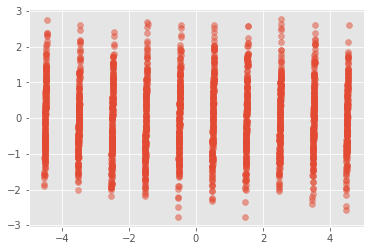

In [327]:
plt.scatter(X_pca[:,0], X_pca[:,1], alpha = 0.5)

##### Scaled

In [328]:
X_pca_s = pca_s.fit_transform(df_cr_num_sc)

In [329]:
X_pca_s

array([[-1.4044503 , -1.08963123],
       [ 1.6959018 ,  0.62308496],
       [ 2.22792973, -2.37795599],
       ...,
       [ 3.07911232, -0.08813869],
       [-1.72766413,  3.39517951],
       [ 3.30163473,  9.96247082]])

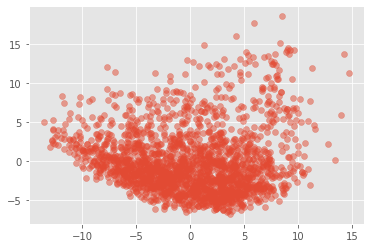

In [330]:
plt.scatter(X_pca_s[:,0], X_pca_s[:,1], alpha = 0.5)

#### 6. Look at the loadings

##### Unscaled

In [331]:
print(pca.components_)

[[ 9.99787595e-01 -3.63377468e-04  2.10472022e-03  6.59695635e-05
  -1.70550759e-04  6.36307653e-05 -1.91991039e-06 -8.20157285e-05
   2.83122416e-04 -4.82259203e-04 -3.76674615e-03 -2.20300625e-04
   4.94441812e-03  3.93218663e-03  3.15348779e-03  9.37857986e-04
   1.45767537e-03 -3.35306248e-03 -3.69666468e-03 -1.03888848e-03
   3.02502015e-03  2.57445724e-03  2.70110118e-03  6.40526867e-04
   1.29125215e-03 -1.82711864e-04  1.80017397e-03  1.38651611e-03
  -5.57558967e-04 -3.59389347e-03 -2.33521963e-03 -2.96704083e-03
   2.04538535e-03 -2.75902224e-03  3.80136203e-03 -2.72478437e-03
  -3.94718765e-04 -4.40347169e-03  2.17185258e-03 -1.80149804e-03
  -1.17450732e-03 -1.26784442e-03 -1.58505555e-03  1.52693553e-03
   2.65827298e-03  2.38523937e-03  3.81839031e-03  1.39209126e-03
   1.16055172e-03  5.05881681e-04 -2.52719613e-04 -1.02233964e-03
   1.58938732e-04 -2.65811057e-03 -1.76770090e-03 -1.60290297e-03
  -1.17825198e-03 -1.00803786e-03 -6.19798665e-04 -5.90472686e-04
  -1.45106

In [332]:
df_components = pd.DataFrame(pca.components_)

In [333]:
df_components.columns = df_cr_num.columns

In [334]:
df_components.head(3)

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.999788,-0.000363,0.002105,0.000066,-0.000171,0.000064,-0.000002,-0.000082,0.000283,-0.000482,-0.003767,-0.000220,0.004944,0.003932,0.003153,0.000938,0.001458,-0.003353,-0.003697,-0.001039,0.003025,0.002574,0.002701,0.000641,0.001291,-0.000183,0.001800,0.001387,-0.000558,-0.003594,-0.002335,-0.002967,0.002045,-0.002759,0.003801,-0.002725,-0.000395,-0.004403,0.002172,-0.001801,-0.001175,-0.001268,-0.001585,0.001527,0.002658,0.002385,0.003818,0.001392,0.001161,0.000506,-0.000253,-0.001022,0.000159,-0.002658,-0.001768,-0.001603,-0.001178,-0.001008,-0.000620,-0.000590,-0.000145,0.000238,0.000079,0.000353,0.000814,0.002462,0.001907,0.002015,0.002103,0.000148,-0.002638,0.003047,0.000089,-0.001002,0.002229,0.000554,0.000838,0.003403,-0.001759,-0.001596,0.002067,0.002366,0.002478,0.002883,0.002674,0.004078,0.003122,0.000318,0.002748,0.000712,-0.000411,-0.000712,0.000076,-0.001951,-0.001351,-0.002535,-0.002009,0.000675,-0.000924,0.000037,-0.002896
1,-0.016430,-0.021394,0.008454,-0.130905,0.127355,0.061561,-0.064135,-0.046577,-0.045981,-0.046704,-0.033010,-0.016792,0.146079,0.185649,0.101677,-0.005967,0.148516,-0.059245,-0.173593,0.005794,0.177225,0.158726,0.137233,0.105486,0.042986,0.080790,0.075788,0.111135,-0.040602,-0.190548,-0.150205,-0.158646,0.140780,-0.152586,0.108796,-0.021765,0.016328,-0.132659,0.133610,-0.106455,-0.041609,-0.102292,-0.110069,-0.014625,0.163264,0.169581,0.178675,0.134679,-0.011056,0.012622,-0.032061,-0.153504,-0.007742,-0.042016,-0.048552,-0.046102,-0.051113,0.001786,-0.000971,0.001955,-0.000690,0.025100,-0.048835,-0.068476,-0.051003,0.021220,0.035419,-0.049933,0.123564,-0.087525,-0.096952,0.110222,-0.035218,0.074166,0.105200,-0.108536,-0.045383,0.041135,-0.198116,-0.109554,0.157663,0.159792,0.159298,0.162993,0.159504,0.188187,0.162970,-0.045125,0.053574,-0.016224,-0.019846,-0.014228,0.024639,-0.046561,0.034502,-0.018039,-0.020748,-0.009187,-0.016852,0.036078,-0.133159


In [335]:
df_components_t = df_components.T.abs()

In [336]:
df_components_t.head(3)

,0,1
fold,0.999788,0.016430
population,0.000363,0.021394
householdsize,0.002105,0.008454


In [337]:
df_components_t.sort_values(by = [0], ascending = False, inplace = True)

In [338]:
df_components_t.head()

,0,1
fold,0.999788,0.016430
pctUrban,0.004944,0.146079
PctOccupManu,0.004403,0.132659
RentHighQ,0.004078,0.188187
medIncome,0.003932,0.185649


The variable **fold** is massively dominating. If we remove this variable, we can improve the PCA performance.

http://archive.ics.uci.edu/ml/datasets/Communities%20and%20Crime%20Unnormalized

**fold:** fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric - integer)

##### Scaled

In [339]:
print(pca_s.components_)

[[-0.00782824  0.05307243 -0.00842312  0.1074448  -0.11677456 -0.04495969
   0.06826603  0.06131817  0.07301269  0.06250266  0.03256145  0.04643302
  -0.05057442 -0.17941213 -0.10992796 -0.00222265 -0.17332097  0.06266103
   0.16348199 -0.01146751 -0.18080157 -0.16698226 -0.14531646 -0.1232611
  -0.05237004 -0.08622705 -0.07994273 -0.1246469   0.08208351  0.1720416
   0.1443088   0.16031093 -0.13470753  0.15724439 -0.1252744   0.01695974
  -0.0202191   0.13230176 -0.14550107  0.12436717  0.06227324  0.12699737
   0.12889892  0.02409607 -0.17154248 -0.17448782 -0.17034448 -0.15065364
   0.00857894 -0.02087832  0.0765915   0.14516171  0.03776522  0.04720602
   0.05654628  0.05744727  0.06500202  0.01777015  0.02030932  0.01792667
   0.0201596  -0.03780917  0.06063472  0.08188618  0.06332417 -0.02398682
  -0.04314441  0.05870172 -0.14085635  0.09881652  0.12738315 -0.09880096
   0.06393678 -0.07819229 -0.12877265  0.10570095  0.03827514 -0.03782302
   0.16229153  0.11040526 -0.13254217 -0

In [340]:
df_components_sc = pd.DataFrame(pca_s.components_)

In [341]:
df_components_sc.columns = df_cr_num.columns

In [342]:
df_components_sc.head(3)

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,-0.007828,0.053072,-0.008423,0.107445,-0.116775,-0.044960,0.068266,0.061318,0.073013,0.062503,0.032561,0.046433,-0.050574,-0.179412,-0.109928,-0.002223,-0.173321,0.062661,0.163482,-0.011468,-0.180802,-0.166982,-0.145316,-0.123261,-0.052370,-0.086227,-0.079943,-0.124647,0.082084,0.172042,0.144309,0.160311,-0.134708,0.157244,-0.125274,0.016960,-0.020219,0.132302,-0.145501,0.124367,0.062273,0.126997,0.128899,0.024096,-0.171542,-0.174488,-0.170344,-0.150654,0.008579,-0.020878,0.076591,0.145162,0.037765,0.047206,0.056546,0.057447,0.065002,0.017770,0.020309,0.017927,0.020160,-0.037809,0.060635,0.081886,0.063324,-0.023987,-0.043144,0.058702,-0.140856,0.098817,0.127383,-0.098801,0.063937,-0.078192,-0.128773,0.105701,0.038275,-0.037823,0.162292,0.110405,-0.132542,-0.129836,-0.127214,-0.140682,-0.144977,-0.144047,-0.146557,0.064549,-0.045531,0.015220,0.056030,0.044232,-0.003111,0.033658,-0.046556,0.014195,0.014163,0.026372,0.033880,-0.018852,0.127244
1,0.004366,0.087973,0.114270,0.006548,-0.118141,0.168013,0.161441,0.033535,0.077506,0.048863,-0.111548,0.092683,0.081033,0.068525,0.091880,-0.018682,-0.019820,-0.121099,0.029916,-0.102534,0.060153,0.047956,0.066246,0.058491,0.028792,0.008928,0.033188,0.019060,0.078661,0.008457,0.027093,0.002082,0.056470,0.024178,0.052606,-0.038637,-0.013028,-0.045638,0.038573,-0.025908,0.109199,0.011286,-0.008117,0.130175,-0.001274,-0.012355,0.012117,-0.010454,-0.067961,-0.085450,0.076106,0.061049,0.141356,0.079616,0.095027,0.108155,0.118118,0.214104,0.216612,0.218812,0.218874,-0.190389,0.186688,0.154078,0.148059,0.113122,0.112634,0.119519,-0.081835,0.173699,0.059296,-0.059033,0.057719,0.028556,-0.074705,0.010866,-0.095951,0.026928,-0.031948,0.036272,0.135328,0.137321,0.135403,0.131940,0.131787,0.133602,0.123123,0.086436,0.149468,-0.021598,0.075108,0.080219,0.212684,-0.128580,-0.069300,-0.054088,-0.069797,0.028719,0.137881,0.105247,0.066192


In [343]:
df_components_sc_t = df_components_sc.T.abs()

In [344]:
df_components_sc_t.head(3)

,0,1
fold,0.007828,0.004366
population,0.053072,0.087973
householdsize,0.008423,0.114270


In [345]:
df_components_sc_t.sort_values(by = [0], ascending = False, inplace = True)

In [346]:
df_components_sc_t.head()

,0,1
medFamInc,0.180802,0.060153
medIncome,0.179412,0.068525
PctKids2Par,0.174488,0.012355
pctWInvInc,0.173321,0.019820
PctPopUnderPov,0.172042,0.008457


#### 7. Remove fold and repeat

In [347]:
# drop fold column
df_cr_num_dr = df_cr_num.drop('fold', 1)

##### Unscaled

In [348]:
# create model
pca_dr = PCA(n_components = 2)

# fit the variable data frame with the model
pca_dr.fit(df_cr_num_dr)

# print explained variables
print(pca_dr.explained_variance_)
print(pca_dr.explained_variance_ratio_)

[1.0884979  0.75511529]
[0.27204086 0.18872082]


In [349]:
X_pca_dr = pca_dr.fit_transform(df_cr_num_dr)

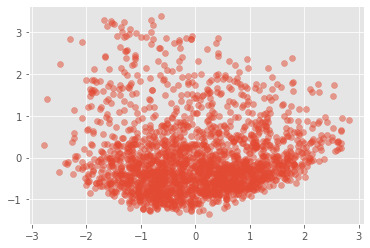

In [350]:
plt.scatter(X_pca_dr[:,0], X_pca_dr[:,1], alpha = 0.5)

In [351]:
print(pca_dr.components_)

[[-0.02136372  0.00879952 -0.13060081  0.1269561   0.06154671 -0.06386817
  -0.04646191 -0.04580696 -0.04664333 -0.03352554 -0.01674978  0.14655748
   0.18582151  0.10195781 -0.00583645  0.14836713 -0.05965087 -0.1736893
   0.00557468  0.17728324  0.15874451  0.13732412  0.10538261  0.0430797
   0.08059923  0.07588589  0.11109153 -0.04056028 -0.19060825 -0.15018259
  -0.15870162  0.14078119 -0.15260695  0.10910574 -0.02210583  0.01622156
  -0.13298057  0.13362686 -0.10648389 -0.04162374 -0.10223614 -0.11005071
  -0.01430423  0.16327661  0.16953339  0.17880733  0.13458042 -0.01091787
   0.01261742 -0.03200335 -0.15326734 -0.00767279 -0.0422281  -0.04862862
  -0.04615176 -0.05108941  0.00179656 -0.00090141  0.00202713 -0.00055569
   0.02493967 -0.04859546 -0.06816799 -0.05067543  0.02159052  0.03567772
  -0.0494628   0.12354251 -0.08719338 -0.09707876  0.11036392 -0.03510843
   0.0738933   0.10524171 -0.10822296 -0.0452436   0.04156238 -0.19795349
  -0.10950818  0.15768465  0.1598498   0

##### Scaled

In [352]:
# scaling
df_cr_num_dr_sc = preprocessing.scale(df_cr_num_dr, axis=0, with_mean=True, with_std=True, copy=True)

In [353]:
# create model
pca_sc_dr = PCA(n_components = 2)

# fit the variable data frame with the model
pca_sc_dr.fit(df_cr_num_dr_sc)

# print explained variables
print(pca_sc_dr.explained_variance_)
print(pca_sc_dr.explained_variance_ratio_)

[25.53120437 16.8425333 ]
[0.255184   0.16834087]


In [354]:
X_pca_dr_sc = pca_sc_dr.fit_transform(df_cr_num_dr_sc)

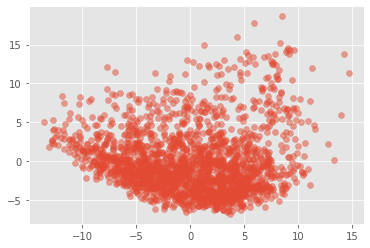

In [355]:
plt.scatter(X_pca_dr_sc[:,0], X_pca_dr_sc[:,1], alpha = 0.5)

#### 8. Plot the samples in the principal component space and colour the points by ViolentCrimesPerPop

Append **ViolentCrimesPerPop** column to the numpy array below (after converting it to pandas df), and then color the plot according to **ViolentCrimesPerPop** colui

In [356]:
X_pca_dr_sc.shape

(1994, 2)

In [357]:
df_cr_num['ViolentCrimesPerPop'].shape

(1994,)

In [358]:
df_X_pca_dr_sc = pd.DataFrame(X_pca_dr_sc)

In [359]:
df_X_pca_dr_sc = pd.concat([df_X_pca_dr_sc, df_cr_num['ViolentCrimesPerPop']], axis=1)

In [360]:
df_X_pca_dr_sc.head(3)

,0,1,ViolentCrimesPerPop
0,-1.416746,-1.082723,0.20
1,1.683610,0.629899,0.67
2,2.215686,-2.371437,0.43


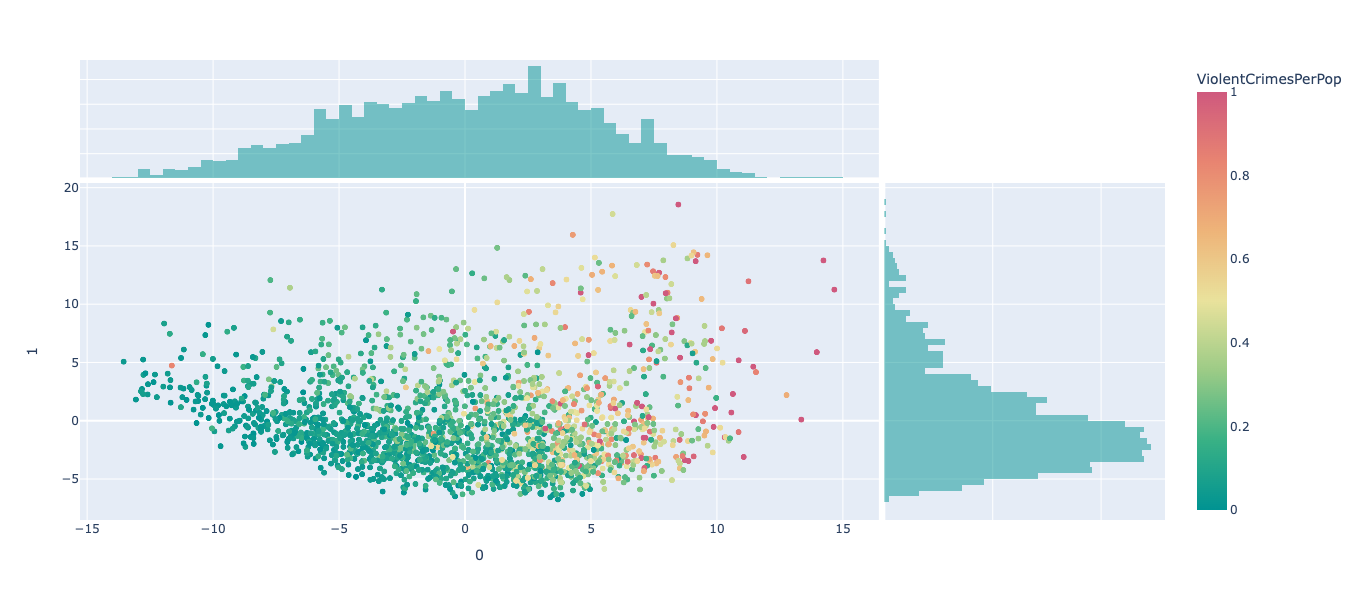

In [361]:
fig = px.scatter(df_X_pca_dr_sc, 
                 x = 0, 
                 y = 1, 
                 color = "ViolentCrimesPerPop",
                 color_continuous_scale = px.colors.diverging.Temps,
                 marginal_x = "histogram", 
                 marginal_y = "histogram",
                 height = 600,
                 width = 1000
                )
fig.show()

##### Comments

We can see that the value of **ViolentCrimesPerPop** feature mostly changes along the first principle component. This means that variance of this feature is mostly captured by the first component.

For further investigation, change the colormap for different variables to see that which principal component is more effective on capturing the variance of that variables.

##### Look at the loadings - which variables seem to relate to this?

In [362]:
print(pca_sc_dr.components_)

[[ 0.05307845 -0.00840538  0.10745634 -0.11679181 -0.04495812  0.06827955
   0.06132684  0.073026    0.06250892  0.03253865  0.04643952 -0.05056706
  -0.17941039 -0.10991768 -0.00221817 -0.17333274  0.06264288  0.16348432
  -0.01147993 -0.18080386 -0.16698606 -0.14531651 -0.12326816 -0.05236718
  -0.0862368  -0.07994095 -0.12465237  0.08209074  0.17204518  0.14431413
   0.16031355 -0.13471041  0.15724882 -0.12526396  0.01694744 -0.02022428
   0.13229339 -0.14550416  0.12436912  0.06227714  0.12700359  0.1289032
   0.02411469 -0.17154697 -0.17449467 -0.17034487 -0.15066177  0.00858377
  -0.02088069  0.07659983  0.14517446  0.03777546  0.0472025   0.05654764
   0.05744975  0.06500752  0.01777525  0.02031629  0.01793366  0.02016855
  -0.03781902  0.06064794  0.08190313  0.06334154 -0.02396922 -0.04313115
   0.05872387 -0.14086318  0.0988343   0.12738276 -0.09880108  0.06394576
  -0.07820392 -0.12877661  0.10571455  0.03827942 -0.03781006  0.16230041
   0.11041085 -0.13254297 -0.1298356  -

In [363]:
# look at the loadings - apply the same process we applied  at step 6

df_components_sc_dr = pd.DataFrame(pca_sc_dr.components_)

df_components_sc_dr.columns = df_cr_num_dr.columns

df_components_sc_dr_t = df_components_sc_dr.T.abs()

df_components_sc_dr_t.sort_values(by = [0], ascending = False, inplace = True)

##### 1. Scaled & without fold column

In [364]:
df_components_sc_dr_t.head()

,0,1
medFamInc,0.180804,0.060171
medIncome,0.179410,0.068540
PctKids2Par,0.174495,0.012338
pctWInvInc,0.173333,0.019798
PctPopUnderPov,0.172045,0.008442


##### 2. Scaled & with fold column

In [365]:
df_components_sc_t.head()

,0,1
medFamInc,0.180802,0.060153
medIncome,0.179412,0.068525
PctKids2Par,0.174488,0.012355
pctWInvInc,0.173321,0.019820
PctPopUnderPov,0.172042,0.008457


In [366]:
df_components_sc_t[0]['fold']

0.007828241842682144

##### 3. Unscaled & without fold column

In [367]:
# look at the loadings - apply the same process we applied  at step 6

df_components_dr = pd.DataFrame(pca_dr.components_)

df_components_dr.columns = df_cr_num_dr.columns

df_components_dr_t = df_components_dr.T.abs()

df_components_dr_t.sort_values(by = [0], ascending = False, inplace = True)

In [368]:
df_components_dr_t.head()

,0,1
PctHousNoPhone,0.197953,0.011821
PctPopUnderPov,0.190608,0.031635
RentHighQ,0.188423,0.136248
medIncome,0.185822,0.040774
PctYoungKids2Par,0.178807,0.017237


##### 4. Unscaled & with fold column

In [369]:
df_components_t.head()

,0,1
fold,0.999788,0.016430
pctUrban,0.004944,0.146079
PctOccupManu,0.004403,0.132659
RentHighQ,0.004078,0.188187
medIncome,0.003932,0.185649


##### Comments

We compare 4 set of loadings:
- 1. Scaled & without **fold** column
- 2. Scaled & with **fold** column
- 3. Unscaled & without **fold** column
- 4. Unscaled & with **fold** column

**Fold** column plays a random number role in the data for (fold number for non-random 10 fold cross validation), and it has no relation to our dependent variable or other independent variables.

Because this is a number changing between 1 and 10 and almost all other numerical features are percentages between 0-1, scaling process changes (reduces) fold values significantly, compared to other numerical features.

So, while it massively dominates the PCA with **unscaled** data frame (4), when we remove this feature from the data frame we can see that even the **unscaled version** (3) leads to similar results to the **scaled** version **with fold** column (2).

### Exercise 2: Multidimensional scaling

#### 1. Load the data

In [370]:
df_lb = pd.read_excel('london-borough-profilesV2.xlsx')

In [371]:
df_lb.head(3)

,Code,Area/INDICATOR,Inner/ Outer London,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013","Proportion of population aged 65 and over, 2013",% of resident population born abroad (2013),Largest migrant population by country of birth (2013),% of largest migrant population (2013),Second largest migrant population by country of birth (2013),% of second largest migrant population (2013),Third largest migrant population by country of birth (2013),% of third largest migrant population (2013),% of population from BAME groups (2013),% people aged 3+ whose main language is not English (2011 census),"Overseas nationals entering the UK (NINo), (2013/14)","New migrant (NINo) rates, (2013/14)",Employment rate (%) (2013/14),Male employment rate (2013/14),Female employment rate (2013/14),Unemployment rate (2013/14),Youth Unemployment rate (2013/14),Proportion of 16-18 year olds who are NEET (%) (2013),Proportion of the working-age population who claim benefits (%) (Feb-2014),% working-age with a disability (2012),Proportion of working age people with no qualifications (%) 2013,Proportion of working age people in London with degree or equivalent and above (%) 2013,"Gross Annual Pay, (2013)",Gross Annual Pay - Male (2013),Gross Annual Pay - Female (2013),% adults that volunteered in past 12 months (2010/11 to 2012/13),Number of jobs by workplace (2012),% of employment that is in public sector (2012),"Jobs Density, 2012","Number of active businesses, 2012",Two-year business survival rates 2012,Crime rates per thousand population 2013/14,Fires per thousand population (2013),Ambulance incidents per hundred population (2013),"Median House Price, 2013","Average Band D Council Tax charge (£), 2014/15",New Homes (net) 2012/13,"Homes Owned outright, (2013) %","Being bought with mortgage or loan, (2013) %","Rented from Local Authority or Housing Association, (2013) %","Rented from Private landlord, (2013) %","% of area that is Greenspace, 2005",Total carbon emissions (2012),"Household Waste Recycling Rate, 2012/13","Number of cars, (2011 Census)","Number of cars per household, (2011 Census)","% of adults who cycle at least once per month, 2011/12","Average Public Transport Accessibility score, 2012",Indices of Multiple Deprivation 2010 Rank of Average Score,Income Support claimant rate (Feb-14),% children living in out-of-work families (2013),"Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2012/13",Rates of Children Looked After (2013),% of pupils whose first language is not English (2014),"Male life expectancy, (2010-12)","Female life expectancy, (2010-12)",Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,City of London,Inner London,8000,4514.371383,290.4,27.525868,41.303887,7.948036,77.541617,14.510348,-,-,-,-,-,-,-,22.557238,17.138103,712,125.307990,!,!,!,!,!,5.059022,4.6,.,!,65.3,.,.,.,.,447900,5.300000,77.46,16765,62.716763,.,11.625,80.875,595000,941.79,40,-,-,-,-,4.8,1498.950518,36.410002,1692,0.385861,18,7.631205,262,0.527983,.,.,98,.,.,.,.,8.10,8.23,7.44,x,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,195600,73261.408580,3610.8,54.160527,33.228935,26.072939,63.835021,10.092040,35.789474,Nigeria,5.814975,Lithuania,4.610818,Pakistan,3.149006,45.712357,18.724201,4405,35.967698,63.2,73.2,53.5,13,25.5,5.754316,14.3,22.6,15.7,21.2,28408,30714,24320,20.529706,54500,22.109533,0.46,4580,70.866142,82.643863,3.767894,14.084867,180000,1315.4,510,15.8,29.1,

#### 2. Deal with the missing data

In [372]:
# convert everythin into numeric and drop the columns with filled with all NaNs
df_lb_ft = df_lb.apply(pd.to_numeric, errors='coerce')
df_lb_ft = df_lb_ft.dropna(axis=1, how='all')

In [373]:
df_lb_ft.head()

,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013","Proportion of population aged 65 and over, 2013",% of resident population born abroad (2013),% of largest migrant population (2013),% of second largest migrant population (2013),% of third largest migrant population (2013),% of population from BAME groups (2013),% people aged 3+ whose main language is not English (2011 census),"Overseas nationals entering the UK (NINo), (2013/14)","New migrant (NINo) rates, (2013/14)",Employment rate (%) (2013/14),Male employment rate (2013/14),Female employment rate (2013/14),Unemployment rate (2013/14),Youth Unemployment rate (2013/14),Proportion of 16-18 year olds who are NEET (%) (2013),Proportion of the working-age population who claim benefits (%) (Feb-2014),% working-age with a disability (2012),Proportion of working age people with no qualifications (%) 2013,Proportion of working age people in London with degree or equivalent and above (%) 2013,"Gross Annual Pay, (2013)",Gross Annual Pay - Male (2013),Gross Annual Pay - Female (2013),% adults that volunteered in past 12 months (2010/11 to 2012/13),Number of jobs by workplace (2012),% of employment that is in public sector (2012),"Jobs Density, 2012","Number of active businesses, 2012",Two-year business survival rates 2012,Crime rates per thousand population 2013/14,Fires per thousand population (2013),Ambulance incidents per hundred population (2013),"Median House Price, 2013","Average Band D Council Tax charge (£), 2014/15",New Homes (net) 2012/13,"Homes Owned outright, (2013) %","Being bought with mortgage or loan, (2013) %","Rented from Local Authority or Housing Association, (2013) %","Rented from Private landlord, (2013) %","% of area that is Greenspace, 2005",Total carbon emissions (2012),"Household Waste Recycling Rate, 2012/13","Number of cars, (2011 Census)","Number of cars per household, (2011 Census)","% of adults who cycle at least once per month, 2011/12","Average Public Transport Accessibility score, 2012",Indices of Multiple Deprivation 2010 Rank of Average Score,Income Support claimant rate (Feb-14),% children living in out-of-work families (2013),"Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2012/13",Rates of Children Looked After (2013),% of pupils whose first language is not English (2014),"Male life expectancy, (2010-12)","Female life expectancy, (2010-12)",Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,8000,4514.371383,290.4,27.525868,41.303887,7.948036,77.541617,14.510348,NaN,NaN,NaN,NaN,22.557238,17.138103,712,125.307990,NaN,NaN,NaN,NaN,NaN,5.059022,4.6,NaN,NaN,65.3,NaN,NaN,NaN,NaN,447900,5.300000,77.46,16765,62.716763,NaN,11.625000,80.875000,595000.0,941.79,40.0,NaN,NaN,NaN,NaN,4.8,1498.950518,36.410002,1692,0.385861,18.0,7.631205,262.0,0.527983,NaN,NaN,98.0,NaN,NaN,NaN,NaN,8.10,8.23,7.44,NaN,NaN,NaN,NaN,NaN
1,195600,73261.408580,3610.8,54.160527,33.228935,26.072939,63.835021,10.092040,35.789474,5.814975,4.610818,3.149006,45.712357,18.724201,4405,35.967698,63.2,73.2,53.5,13.0,25.5,5.754316,14.3,22.6,15.7,21.2,28408.0,30714.0,24320.0,20.529706,54500,22.109533,0.46,4580,70.866142,82.643863,3.767894,14.084867,180000.0,1315.40,510.0,15.8,29.1,34.9,17.9,33.6,780.835372,26.844726,56966,0.817526,9.0,2.994817,22.0,4.041773,27.905586,60.2,76.0,44.694067,77.6,82.0,35.4,7.06,7.57,6.97,3.30,0.000000,100.000000,0.000000,38.16
2,370000,141385.794900,8674.8,42.651374,36.896246,20.886408,65.505593,13.607999,35.854342,2.234626,2.0

In [374]:
# replace NaNs with mean of the columns
df_lb_ft.fillna(df_lb_ft.mean(), inplace = True)

#### 3. Compute the distance matrix

In [375]:
from sklearn.metrics import euclidean_distances
from sklearn.manifold import MDS

In [376]:
distMatrix = euclidean_distances(df_lb_ft, df_lb_ft)

In [377]:
distMatrix

array([[0.00000000e+00, 6.08448721e+05, 5.65149417e+05, ...,
        1.05962451e+07, 6.99828719e+07, 8.50050604e+07],
       [6.08448721e+05, 5.52427173e-03, 2.83691033e+05, ...,
        1.05939685e+07, 6.99450923e+07, 8.49635694e+07],
       [5.65149417e+05, 2.83691033e+05, 0.00000000e+00, ...,
        1.03659809e+07, 6.97191812e+07, 8.47425514e+07],
       ...,
       [1.05962451e+07, 1.05939685e+07, 1.03659809e+07, ...,
        0.00000000e+00, 5.96945471e+07, 7.49866363e+07],
       [6.99828719e+07, 6.99450923e+07, 6.97191812e+07, ...,
        5.96945471e+07, 0.00000000e+00, 1.70120859e+07],
       [8.50050604e+07, 8.49635694e+07, 8.47425514e+07, ...,
        7.49866363e+07, 1.70120859e+07, 0.00000000e+00]])

#### 4. Perform MDS

In [378]:
df_lb_ft.shape

(38, 69)

In [379]:
mds = MDS(n_components = 2)

In [380]:
lb_ft_transformed = mds.fit_transform(df_lb_ft)

df_lb_ft_transformed = pd.DataFrame(lb_ft_transformed)

In [381]:
df_lb_ft_transformed.shape

(38, 2)

#### 5. Visualise the data on a 2D scatterplot

In [382]:
df_lb_ft_transformed.head()

,0,1
0,-3.587466e+06,2.964427e+06
1,-4.020009e+06,2.506290e+06
2,-3.748316e+06,2.440652e+06
3,-3.949819e+06,2.487717e+06
4,-3.804394e+06,2.517044e+06


In [383]:
df_lb_ft_transformed = pd.concat([df_lb_ft_transformed, df_lb['Area/INDICATOR']], axis=1)

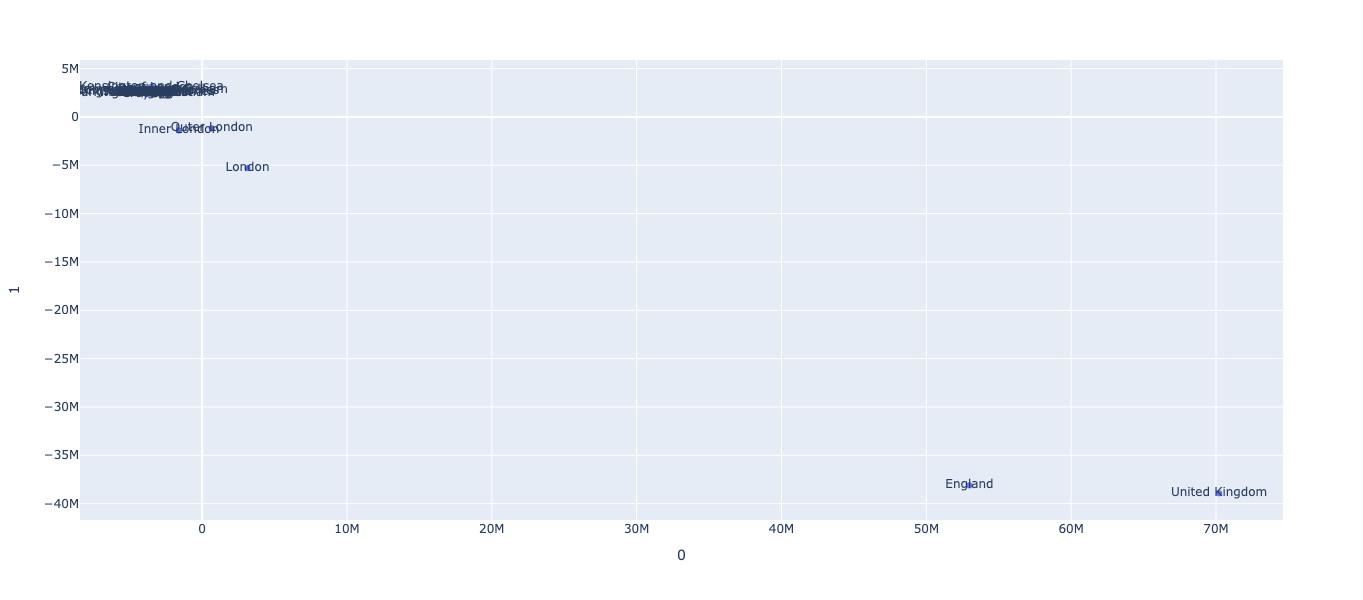

In [384]:
fig = px.scatter(df_lb_ft_transformed, 
                 x = 0, 
                 y = 1,
                 text = "Area/INDICATOR",
                 height = 600,
                 width = 1000
                )

fig.show()

United Kingdom, England, London, Outer London and Inner London areas are not boroughs but aggregated areas, so their values are very different from the rest of the boroughs.

#### 6. Boroughs that are not boroughs

Remove these 5 areas that are not boroughs and plot the scatterplot again.

In [385]:
values = ['United Kingdom', 'England', 'London', 'Outer London', 'Inner London']
# create a dataframe only for the values
df_lb_ft_transformed[(df_lb_ft_transformed['Area/INDICATOR'].isin(values))]

,0,1,Area/INDICATOR
33,-1.601776e+06,-1.401553e+06,Inner London
34,6.634655e+05,-1.174998e+06,Outer London
35,3.134417e+06,-5.292062e+06,London
36,5.297749e+07,-3.811236e+07,England
37,7.021396e+07,-3.892614e+07,United Kingdom


In [386]:
# remove indexes from 33 to 37
df_lb_ft_transformed_dr = df_lb_ft_transformed.drop(labels = [33,34,35,36,37], axis = 0)

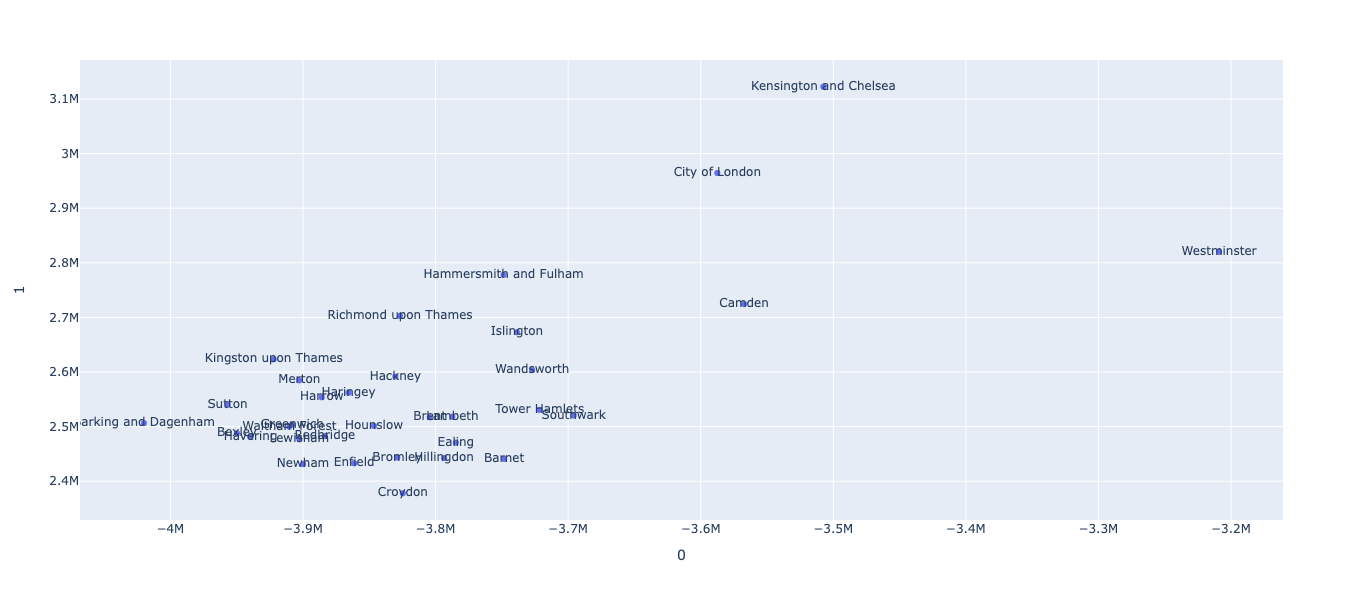

In [387]:
fig = px.scatter(df_lb_ft_transformed_dr, 
                 x = 0, 
                 y = 1,
                 text = "Area/INDICATOR",
                 height = 600,
                 width = 1000
                )

fig.show()

#### 7. Reflect on the "similarity"

Resulting data frame is much more readible when visualised.

However, this model has been created with all the features in the original data frame, so it shows the similarity of boroughs based on all features.

For example, Westminster and Kensington and Chelsea are the most dicrete boroughs when all the features have been considered.

##### Choose some that might reflect emotional well-being and repeat MDS

In [388]:
df_lb_ft_sl = df_lb_ft[['Life satisfaction score 2012-13 (out of 10)',
                        'Worthwhileness score 2012-13 (out of 10)',
                        'Happiness score 2012-13 (out of 10)',
                        'Anxiety score 2012-13 (out of 10)']]

In [389]:
df_lb_ft_sl.shape

(38, 4)

In [390]:
mds = MDS(n_components = 2)

In [391]:
lb_ft_sl_transformed = mds.fit_transform(df_lb_ft_sl)

df_lb_ft_sl_transformed = pd.DataFrame(lb_ft_sl_transformed)

In [392]:
df_lb_ft_sl_transformed.shape

(38, 2)

##### Add borough column

In [393]:
df_lb_ft_sl_transformed = pd.concat([df_lb_ft_sl_transformed, df_lb['Area/INDICATOR']], axis=1)

##### Remove non-borough rows

In [394]:
values = ['United Kingdom', 'England', 'London', 'Outer London', 'Inner London']
# create a dataframe only for the values
df_lb_ft_sl_transformed[(df_lb_ft_sl_transformed['Area/INDICATOR'].isin(values))]

,0,1,Area/INDICATOR
33,0.069088,0.134718,Inner London
34,0.011681,-0.061337,Outer London
35,0.027481,0.011758,London
36,-0.094031,-0.281719,England
37,-0.100766,-0.306929,United Kingdom


In [395]:
# remove indexes from 33 to 37
df_lb_ft_sl_transformed_dr = df_lb_ft_sl_transformed.drop(labels = [33,34,35,36,37], axis = 0)

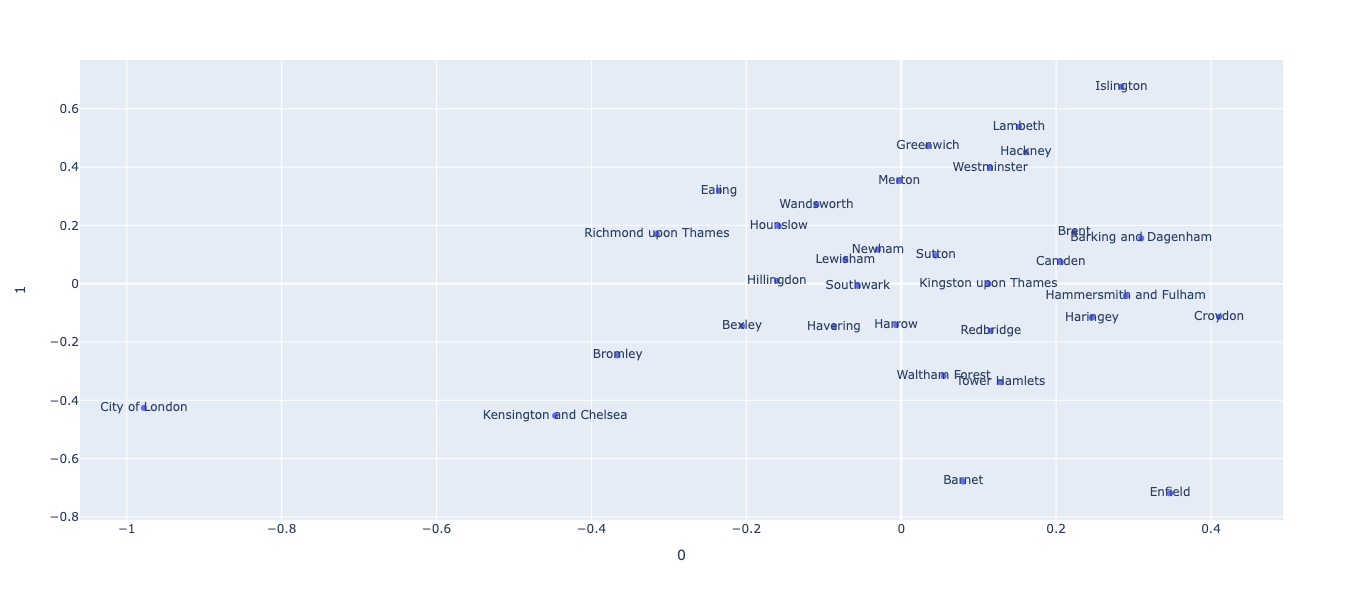

In [396]:
fig = px.scatter(df_lb_ft_sl_transformed_dr, 
                 x = 0, 
                 y = 1,
                 text = "Area/INDICATOR",
                 height = 600,
                 width = 1000
                )

fig.show()

##### Comments

Islington is the highest end of the plot, which also aligns with the "Islington has issues" infographic on https://www.oliveruberti.com/the-information-capital.

### Exercise 3: Group wines based on their characteristics - unsupervised clustering

#### 1. Load the data and extract the features

In [397]:
df_wn = pd.read_csv('wine.csv')

In [398]:
df_wn.shape

(178, 14)

In [399]:
df_wn.head(3)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [400]:
# check the labels we have in the data
df_wn['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [401]:
# extract the features
df_wn_ft = df_wn.iloc[:,1:]

In [402]:
df_wn_ft.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


#### 2. Clustering with k-means

In [403]:
kmeans = KMeans(n_clusters = 3, random_state = 4).fit(df_wn_ft)

In [404]:
kmeans.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [405]:
# create cluster labels data frame
cluster_labels = pd.DataFrame(kmeans.labels_)
cluster_labels.rename(columns = {0:'cluster_labels'}, inplace = True)

In [406]:
labels.head(3)

,cluster_labels
0,1
1,1
2,1


#### 3. Compare clustering labels with known labels

In [407]:
known_labels = df_wn.iloc[:,0:1] # known labels

In [408]:
# merge known labels into cluster label data frame
df_merged_labels = df = pd.concat([cluster_labels, known_labels], axis=1)

# rename the columns
df_merged_labels.rename(columns = {'Class label':'known_labels'}, inplace = True)

In [409]:
df_merged_labels.head()

,cluster_labels,known_labels
0,1,1
1,1,1
2,1,1
3,1,1
4,2,1


In [410]:
df_merged_labels.groupby(["cluster_labels", "known_labels"]).agg({'known_labels':['count']})

known_labels
                                   count
cluster_labels known_labels             
0              2                      50
               3                      19
1              1                      46
               2                       1
2              1                      13
               2                      20
               3                      29

In [411]:
df_merged_labels.corr(method='pearson', min_periods=1)

,cluster_labels,known_labels
cluster_labels,1.000000,-0.029116
known_labels,-0.029116,1.000000


#### 4. Try MDS and inspect visually

##### MDS

In [412]:
df_wn_ft.shape

(178, 13)

In [413]:
mds2 = MDS(n_components = 2)

In [414]:
wn_ft_transformed = mds2.fit_transform(df_wn_ft)

df_wn_ft_transformed = pd.DataFrame(wn_ft_transformed)

In [415]:
df_wn_ft_transformed.shape

(178, 2)

##### Visualisation

In [416]:
# concatenate label data frame to dimension reduced feature data frame
df_wn_ft_transformed_cc = pd.concat([df_wn_ft_transformed, df_merged_labels], axis=1)

In [417]:
df_wn_ft_transformed_cc.head(3)

,0,1,cluster_labels,known_labels
0,259.811553,-184.719115,1,1
1,231.130241,-196.971905,1,1
2,346.412666,-268.439107,1,1


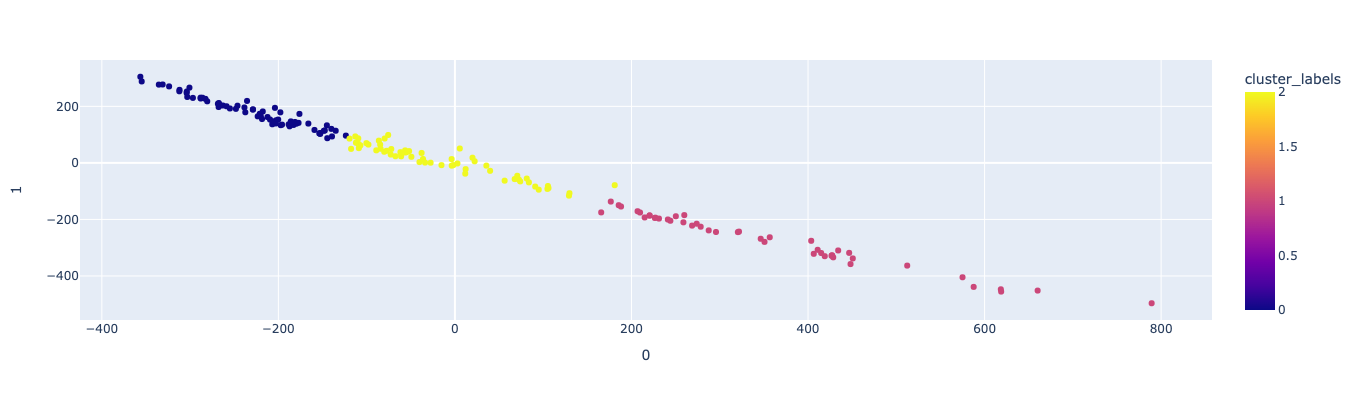

In [418]:
fig = px.scatter(df_wn_ft_transformed_cc, 
                 x = 0, 
                 y = 1,
                 color = 'cluster_labels',
                 height = 400,
                 width = 1000
                )

fig.show()

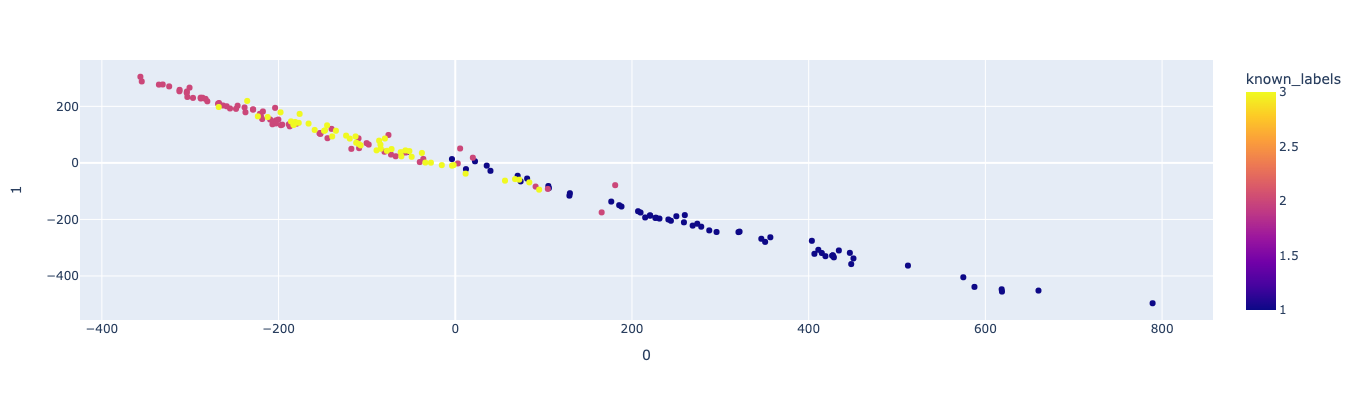

In [419]:
fig = px.scatter(df_wn_ft_transformed_cc, 
                 x = 0, 
                 y = 1,
                 color = 'known_labels',
                 height = 400,
                 width = 1000
                )

fig.show()

#### 5. Optional - Use RandomForest to investigate which features drive the known classes

### Exercise 4: Cross-validation

#### 1. Load the data and selec dependent and independent variables

In [489]:
dependent = df_cr["ViolentCrimesPerPop"]
independent = df_cr["medIncome"]

#### 2 & 3. Use k-fold approach

Run: 0
------------------------------------------------------------------

Lengths
---------------------------------
1994 1595 399

Parameters
---------------------------------
Intercept:  [0.41494657]
Coefficients:  [[-0.48689301]]
Mean squared error: 0.05
Coefficient of determination: 0.12

Plot
---------------------------------


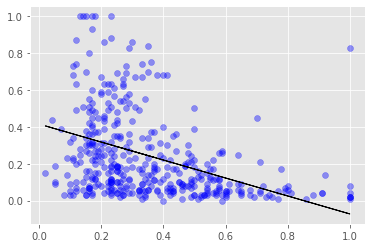


Residuals
---------------------------------


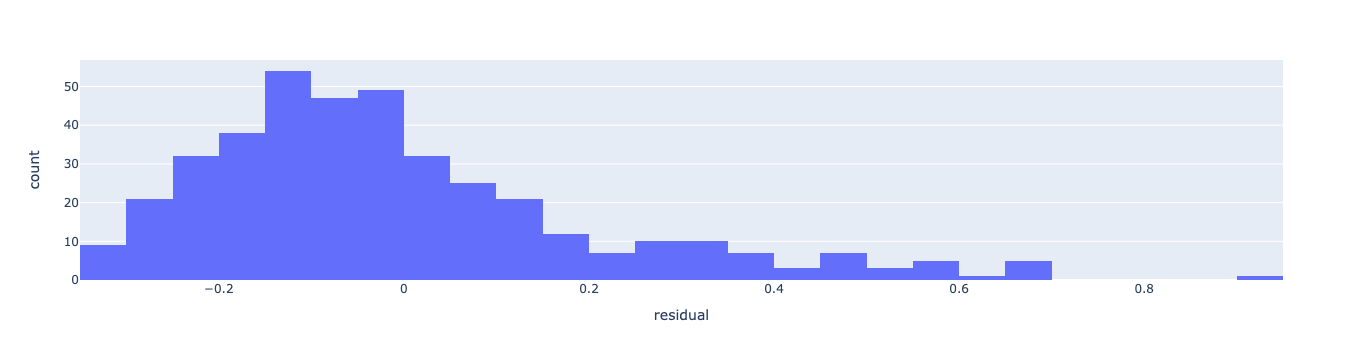




Run: 1
------------------------------------------------------------------

Lengths
---------------------------------
1994 1595 399

Parameters
---------------------------------
Intercept:  [0.40225148]
Coefficients:  [[-0.4629025]]
Mean squared error: 0.05
Coefficient of determination: 0.16

Plot
---------------------------------


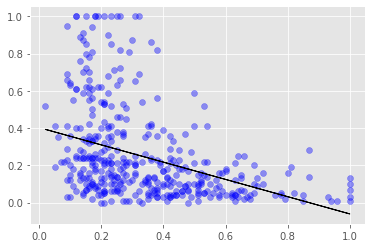


Residuals
---------------------------------


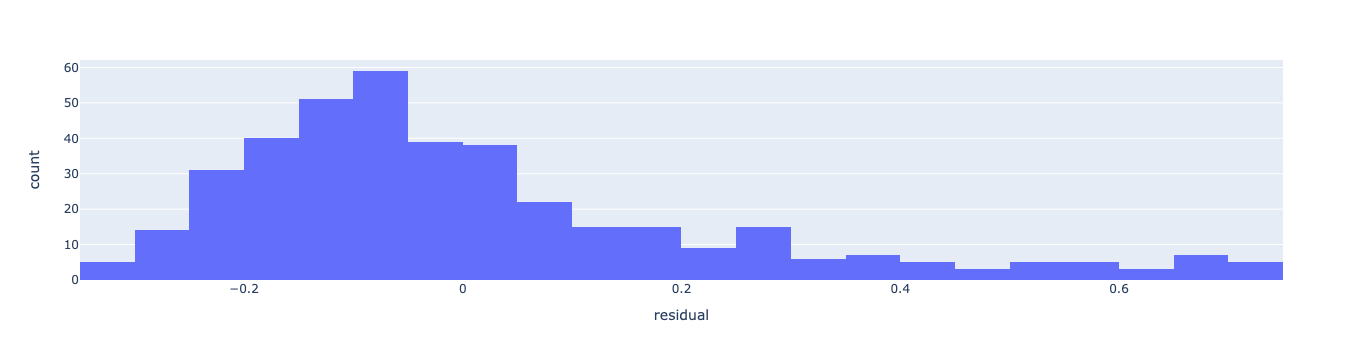




Run: 2
------------------------------------------------------------------

Lengths
---------------------------------
1994 1595 399

Parameters
---------------------------------
Intercept:  [0.40563954]
Coefficients:  [[-0.46524538]]
Mean squared error: 0.05
Coefficient of determination: 0.21

Plot
---------------------------------


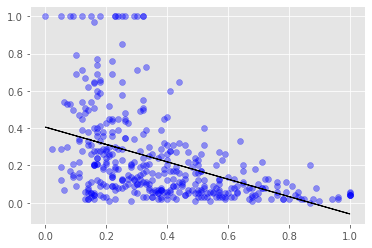


Residuals
---------------------------------


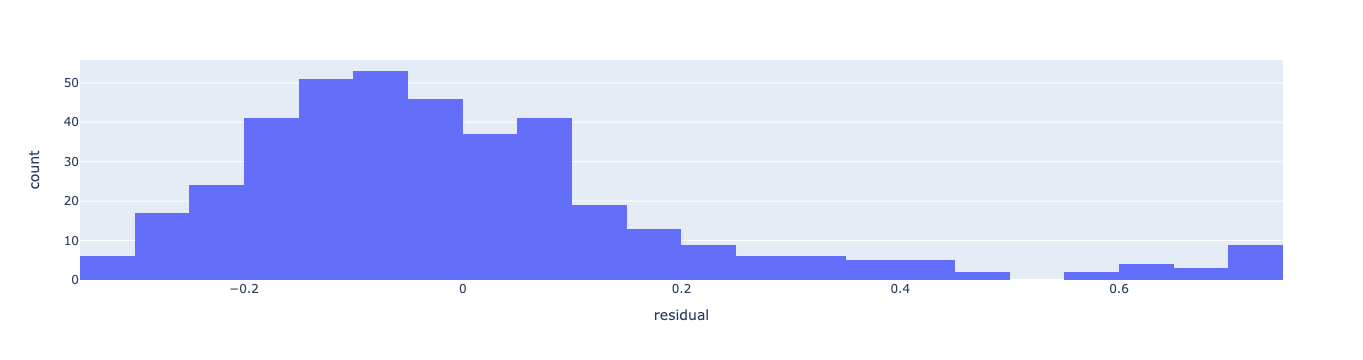




Run: 3
------------------------------------------------------------------

Lengths
---------------------------------
1994 1595 399

Parameters
---------------------------------
Intercept:  [0.40821314]
Coefficients:  [[-0.46968388]]
Mean squared error: 0.04
Coefficient of determination: 0.22

Plot
---------------------------------


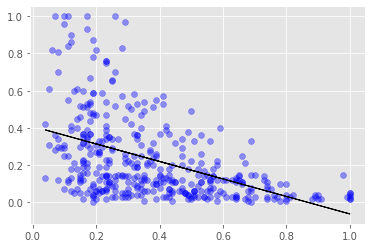


Residuals
---------------------------------


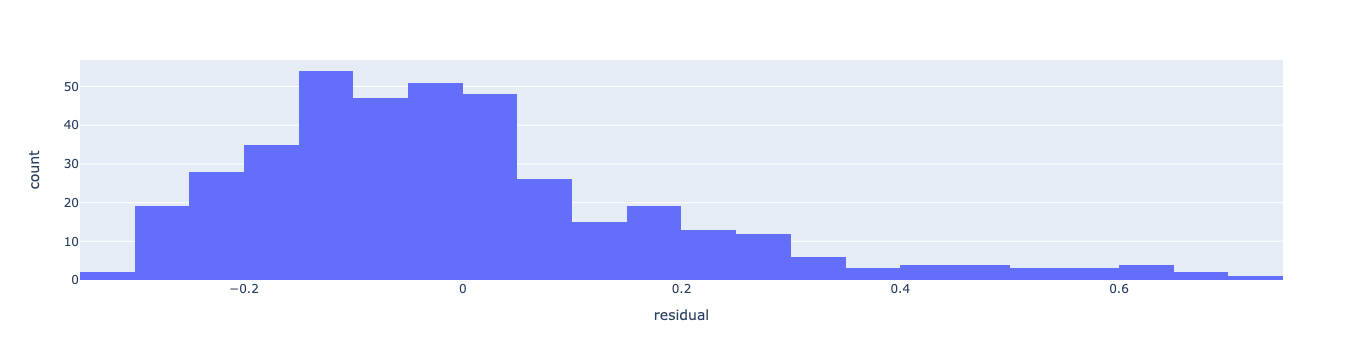




Run: 4
------------------------------------------------------------------

Lengths
---------------------------------
1994 1596 398

Parameters
---------------------------------
Intercept:  [0.41094481]
Coefficients:  [[-0.47486011]]
Mean squared error: 0.04
Coefficient of determination: 0.18

Plot
---------------------------------


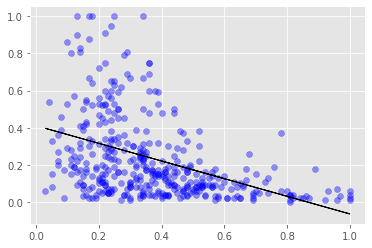


Residuals
---------------------------------


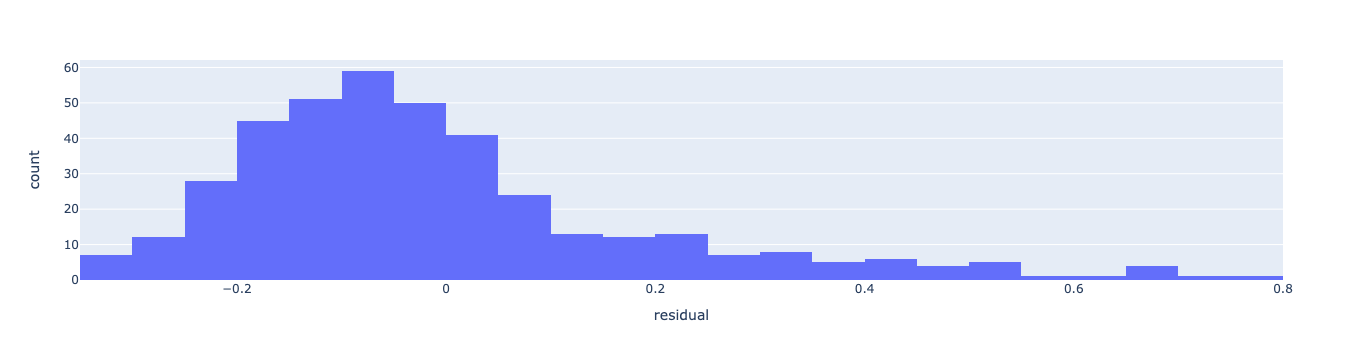

In [515]:
# the data is split 5 times, in each split, a fifth used for testing and four fifths for training
kf = KFold(n_splits = 5)
foldCount = 0

for train_idxs, test_idxs in kf.split(df_cr):
    print("Run:", foldCount)
    print('------------------------------------------------------------------')
    print('\nLengths')
    print('---------------------------------')
    print(len(df_cr), len(train_idxs), len(test_idxs))
    
    
    # Extract the test (unseen) and training subset
    dependentSubset = pd.DataFrame(dependent[train_idxs])
    independentSubset = pd.DataFrame(independent[train_idxs])
    dependentSubsetUnseen = pd.DataFrame(dependent[test_idxs])
    independentSubsetUnseen = pd.DataFrame(independent[test_idxs])
    
    
    #print('\nShapes\n---------------------------------')
    #print("Shape of the dependent variable's training dataset: ", dependentSubset.shape)
    #print("Shape of the independent variable's training dataset: ", independentSubset.shape)
    #print("Shape of the dependent variable's test dataset: ", dependentSubsetUnseen.shape)
    #print("Shape of the independent variable's test dataset: ", independentSubsetUnseen.shape)
    
    
    # Build a regression model on the training set and report its parameters
    regr = linear_model.LinearRegression()
    
    # train the model using the training sets - these are the ones with higher size
    regr.fit(independentSubset, dependentSubset)
    
    # make predictions using the testing set
    prediction = regr.predict(independentSubsetUnseen)
    
    
    # Parameters
    print('\nParameters\n---------------------------------')
    # the intercept
    print("Intercept: ", regr.intercept_)
    # the coefficients
    print("Coefficients: ", regr.coef_)
    # the mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(dependentSubsetUnseen, prediction))
    # the coefficient of determination: 1 is perfect prediction - R2
    print("Coefficient of determination: %.2f" % r2_score(dependentSubsetUnseen, prediction))
    
    
    # Plot
    print('\nPlot\n---------------------------------')
    plt.scatter(independentSubsetUnseen, dependentSubsetUnseen, color = "blue", alpha = 0.4) # observed
    plt.plot(independentSubsetUnseen, prediction, color = "black", linewidth=1)
    plt.show()
    
    
    # Residuals
    print('\nResiduals\n---------------------------------')
    
    dependentSubsetUnseen = pd.DataFrame(dependentSubsetUnseen)
    dependentSubsetUnseen.reset_index(drop = True, inplace = True)
    dependentSubsetUnseen.rename(columns = {'ViolentCrimesPerPop':'observed'}, inplace = True)
    
    prediction = pd.DataFrame(prediction)
    prediction.reset_index(drop = True, inplace = True)
    prediction.rename(columns = {0:'predicted'}, inplace = True)
    
    df_res = pd.concat([dependentSubsetUnseen, prediction], axis=1)
    df_res['residual'] = df_res.observed - df_res.predicted
    
    fig = px.histogram(df_res, x = "residual", height = 350, width = 500)
    fig.show()
    
    
    foldCount += 1
    print('\n\n')